## Homework 6, Problem 1 on reaching data and neural data

ECE C143A/C243A, Spring Quarter 2023, Prof. J.C. Kao, TAs T. Monsoor, R. Gore, D. Singla

Total: 20 points

Download the dataset `JR_2015-12-04_truncated2.mat` from BruinLearn.

This data structure contains simultaneous reaching (kinematic) data and neural data.
A large part of this question will be getting acquainted with this data.

Loading the downloaded file will drop a variable called `R`, in your Python workspace.
We will call this variable the R-dict (or sometimes R-struct).

It is an array of dictionaries, with each dictionary in the array corresponding to one trial performed by Monkey J. In this data, Monkey J is performing a reaching task in which he acquires a center target, and then a peripheral target. After acquiring the peripheral target, he comes back to acquire the center target, and then acquires another peripheral target. This task is called a "center-out-and-back" task as the monkey continuously reaches from the center to a peripheral target, and then back to the center.

This assignment incorporates the `scipy` package.  If you do not have it installed, you can install it by running:

`pip install scipy`

You may also install a package compiler for scientific computing, like `anaconda`: https://www.anaconda.com/download/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
import scipy.io as sio
import math
import nsp as nsp
# Load matplotlib images inline
%matplotlib inline
# Reloading any code written in external .py files.
%load_ext autoreload
%autoreload 2
data = sio.loadmat('JR_2015-12-04_truncated2.mat') # load the .mat file.
R = data['R'][0,:]

### (a) (1 point) How many trials?

How many trials were performed by Monkey J in this R-struct?

In [22]:
print(f"The monkey performed {len(R)} trials")

The monkey performed 506 trials


Answer: 506 trials

### (b) (2 point) Where are the targets?

`R[i]['target']` is the target that Monkey J reached to on trial `i`.  How many unique targets are there?  Please provide a 2D plot of all the target locations.  Ignore the 3rd dimension ($z$-location) which is by default set at $-70$ (i.e., it was not used). The units of `R[0,i]['target']` are in millimeters.


[-84.85]


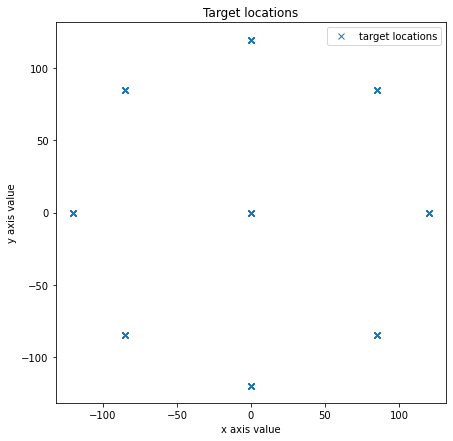

In [51]:
plt.figure(figsize=(7,7))

print(R[505]['target'][0])

x_targets= []
y_targets = []

for i in range(len(R)):
    x_targets.append(R[i]['target'][0])
    y_targets.append(R[i]['target'][1])

plt.plot(x_targets, y_targets, 'x', label = "target locations")
plt.xlabel("x axis value")
plt.ylabel("y axis value")
plt.title("Target locations")
plt.legend()

plt.show()

Question: How many unique targets(including the center target) are there?

Answer: 9

### (c) (1 point) How many failures?

`R[i]['isSuccessful']` indicates if Monkey J successfully acquired the target on trial $i$.  This means that he reaches to the target and holds his position within a $4$cm by $4$cm box centered around the target for $500$ms.  How many failures are there in this R-struct? 

Hint: `isSuccessful` attribute has the dtype of uint8. Be careful about data types; in general it's always good practice to perform operations on same data types.  If the number of trials is encoded as an `int`, you should cast the `isSuccessful` variable to be an int. You may achieve this by calling `isSuccessful = np.asarray(R['isSuccessful'], dtype=int)`.

In [48]:
isSuccessful = np.asarray(R['isSuccessful'], dtype=int)

for i in range(len(isSuccessful)):
    if (R[i]["isSuccessful"] != 1):
        print("Not 1!")



Question: How many failures are there in this R-struct?

Answer: 0

### (d) (2 points) Kinematic sampling. [Code is provided; but you still need to analyze the output and answer the question]

`R[i]['cursorPos']` is a $3 \times T_i$ matrix that contains the monkey's hand position over time on trial $i$, where $T_i$ is the length of trial $i$ in milliseconds. 

* The 1st row is the $x$ position and the 2nd row is the $y$ position of Monkey J.
* The units are in millimeters.
* Ignore the 3rd row -- which is $z$ position (set to $-70$ mm by default in this data).
* Each column represents $1$ ms.  That is, if $T_i = 1032$, this indicates that the trial lasted for $1032$ milliseconds. Note that `R[i]['cursorPos'][:,-1]` and `R[i+1]['cursorPos'][:,0]` are also separated by $1$ ms, so that the R-struct contains millisecond resolution data and no segments of time are unobserved.
* The kinematics in `R[0,i]['cursorPos']` are sampled from a system called 'Polaris' that tracks a bead taped on the monkey's finger.
		
Observe the values of `R[i]['cursorPos']`.
Does the ''Polaris'' system sample the monkey's kinematics at $1$ ms resolution (i.e., $1000$ Hz)?
If not, approximately at what frequency does Polaris sample the kinematics?        

In [50]:
#set printoption so that you can view the whole array by call print 
np.set_printoptions(threshold=np.inf, linewidth=np.nan)
#====================================================#
# YOUR CODE HERE:
#   Analysis the frequency of sampling
#====================================================#
i=1
print(R[i]['cursorPos'][:,0:200]) 
# we just print 0:200 because there are too many elements, 200 is enough to estimate the frequency

#====================================================#
# END YOUR CODE
#====================================================#

[[  1.73   1.73   1.73   1.73   1.73   1.73   1.73   1.73   1.73   1.73   1.96   1.96   1.96   1.96   1.96   1.96   1.96   1.96   1.96   1.96   1.96   1.96   1.96   1.96   1.96   1.96   2.23   2.23   2.23   2.23   2.23   2.23   2.23   2.23   2.23   2.23   2.23   2.23   2.23   2.23   2.23   2.23   2.23   2.47   2.47   2.47   2.47   2.47   2.47   2.47   2.47   2.47   2.47   2.47   2.47   2.47   2.47   2.47   2.47   2.47   2.66   2.66   2.66   2.66   2.66   2.66   2.66   2.66   2.66   2.66   2.66   2.66   2.66   2.66   2.66   2.66   2.83   2.83   2.83   2.83   2.83   2.83   2.83   2.83   2.83   2.83   2.83   2.83   2.83   2.83   2.83   2.83   2.83   2.93   2.93   2.93   2.93   2.93   2.93   2.93   2.93   2.93   2.93   2.93   2.93   2.93   2.93   2.93   2.93   2.93   2.99   2.99   2.99   2.99   2.99   2.99   2.99   2.99   2.99   2.99   2.99   2.99   2.99   2.99   2.99   2.99   3.05   3.05   3.05   3.05   3.05   3.05   3.05   3.05   3.05   3.05   3.05   3.05   3.05   3.05   3.05   3.05   3.

Question: Does the 'Polaris' system sample the monkey's kinematics at  1  ms resolution (i.e., 1000Hz)? If not, approximately at what frequency does Polaris sample the kinematics?

Answer: 

### (e) (1 points) Reach trajectories.

Present a 2D plot showing Monkey J's hand position across the entire R-dict. Does it look like the plot of a center-out-and-back task?

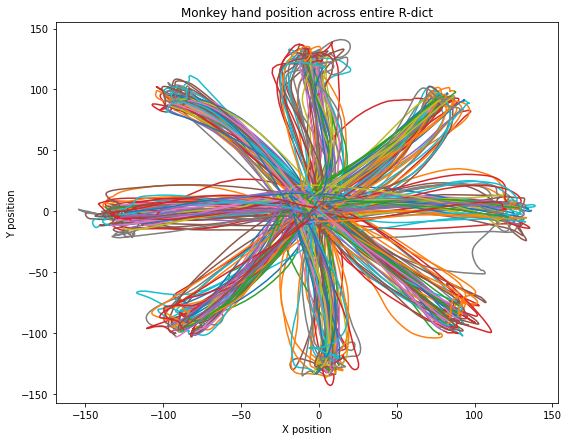

In [85]:
plt.figure(figsize=(9,7))

x_coord = []
y_coord = []

for i in range(len(R)):
    x_coord = R[i]['cursorPos'][0]
    y_coord = R[i]['cursorPos'][1]
    plt.plot(x_coord, y_coord)


plt.title("Monkey hand position across entire R-dict")
plt.xlabel("X position")
plt.ylabel("Y position")
plt.show()






Question: Does it look like the plot of a center-out-and-back task?

Answer: Yes

### (f) (1 points) Number of electrodes.

The R-struct contains neural data recorded from electrode arrays implanted in Monkey J's motor cortex.

We'll only consider `R[i]['spikeRaster']`, which is an $N \times T_i$ matrix of activity from primary motor cortex (M1).

(There is an `R[i]['spikeRaster2']`, which we will ignore. It contains activity from PMd.)

There are $N$ electrodes, and each electrode is measuring spiking activity. Each row of `R[i]['spikeRaster']` corresponds to the spiking activity, at millisecond resolution, for Monkey J. If the value of row $n$ and column $t$ is 1, then it indicates that a neuron spiked on electrode $n$ at time $t$. If the value of this entry is 0, it indicates that no spike occurred on electrode $n$ at time $t$.

Note that we store `R[i]['spikeRaster']` as a sparse matrix, since a neuron is often not spiking (corresponding to $0$'s).

It is more memory efficient to store the locations of the non-zero values in the matrix than to store the entire matrix.

In Python, one may use the command `.todense()` to make this a standard matrix.

How many electrode channels are there?         

In [105]:
print(np.shape(R[0]['spikeRaster']))
print(np.shape(R[200]['spikeRaster']))



(96, 901)
(96, 1001)


Question: How many electrode channels are there?     

Answer: 96

### (g) (4 points) Spike raster. [Code solution provided; please understand it]

Plot a spike raster of all reaches to the right target, located at (120 mm,0 mm), for electrode 17.          
(Hint: use the `nsp.PlotSpikeRaster` function in `nsp.py`.)     

In [127]:
#====================================================#

# first an if to find the trials that are going to the right target -- here the 'output' should be i in R[i]
# then you have to access 'spikeRaster' within R[i] -- R[i]['spikeRaster]
# 'spikeRaster' is a 96 x (len) shaped structure. I need to get to the 17th row - and that is the array in question 


#====================================================#

# spike_train = np.empty((0,0),dtype = list)

spike_train = []

f = 0
for i in range(506):
    target = R[i]['target'][0:2]    
    if target[0]==120 and target[1]== 0 :
        spike_train = np.append(spike_train,0)
        spike_train[f] =  R[i]['spikeRaster'][16,:].todense().nonzero()[1]
        f = f + 1
nsp.PlotSpikeRaster(spike_train)
plt.xlabel('Time is ms')
plt.ylabel('Neurons')
plt.title('Spike Raster')
#====================================================#
# END YOUR CODE
#====================================================#

ValueError: setting an array element with a sequence.

/Users/sgb/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3245: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size


Text(0.5, 1.0, 'Spike Raster')

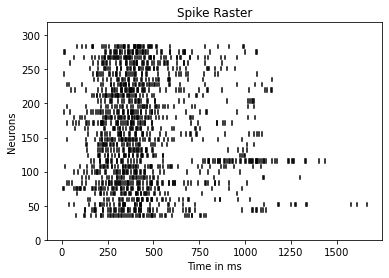

In [128]:
spike_train = []  # Create an empty list

for i in range(506):
    target = R[i]['target'][0:2]
    if target[0] == 120 and target[1] == 0:
        spike_train.append(R[i]['spikeRaster'][16, :].todense().nonzero()[1])

nsp.PlotSpikeRaster(spike_train)
plt.xlabel('Time in ms')
plt.ylabel('Neurons')
plt.title('Spike Raster')


### (h) (4 points) ISI distribution.

Plot the ISI distribution for electrode 17 across all trials in the R-dict (i.e., one ISI histogram with data from all reaches).  
Make the ISI histogram bins $10$ ms wide. Did we spike sort this neural data?

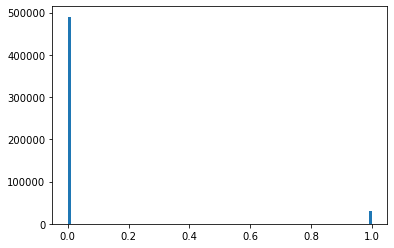

In [162]:
# I am going to take each i in 506 (trials) -- R[i]['spikeRaster]
# np.diff on each of those -- append to a list called ISI_list -- what units will this be in (?)
# assuming the units are ms - then I should just be able to do plt.hist(ISI_list, 10)

ISI_list = []

for i in range(506):
    spike_raster_i = R[i]['spikeRaster'][16, :].todense()
    spike_raster_array = np.array(spike_raster_i)
    ISI_list.extend(np.diff(spike_raster_array).flatten())
    abs_ISI_list = np.abs(ISI_list)

plt.hist(abs_ISI_list, 100)
plt.show()

Question: Did we spike sort this neural data? 

Answer:    Yes

### (i) (4 points) PSTH.

Plot the average firing rate for each of 8 unique peripheral reach directions for electrode 17.

To do so, we have provided a binning function, `nsp.bin` which takes a spike raster matrix and counts the spikes in non-overlapping windows of some length $\Delta t$ (to be specified as an input) for each neuron.

Do the following: 
* Call `nsp.bin` in the correct way to bin the spikes in non-overlapping $25$ ms bins.
* Then, for each of the $8$ unique center-out reach conditions, average the binned spike counts for electrode 17, from $t=0$ to $500$ ms.
* For each of these traces, smooth them by using smooth function in `nsp.smooth` with `window_len = 5`, i.e., if one of these 8 traces was stored as the variable `trace`, you would call `trace = nsp.smooth(trace, window_len = 5)`.
* You should now have 8 traces of averaged binned spike counts for electrode 17.
* Plot these average, smoothed, firing rates through time on the same plot (x-axis time in ms, y-axis firing rate; be sure to get the unit scale correct. Use a different color for each of the 8 reach conditions. Note, these trial-averaged plots of the firing rate are often called peri-stimulus time histograms, or PSTHs. We do this to visualize the data and be sure it makes sense.

In [207]:

# instead of iterating through i, I am going to iterate through targets. 
# my targets are (0,0) (0, -120) (0, 120) (-120, 0) (120, 0) (-84.85, -84.85) (-84.45, 84.45) (84.45, 84.45) (84.45, -84.45)


for i in range(20):
    spike_raster_ii = R[i]['spikeRaster']
    binned_sr = nsp.bin(spike_raster_ii, 25, 'first')
    print("length of binned_sr" , len(binned_sr))
    binned_sr_17 = binned_sr[16]
    #### HOW CAN THIS LENGTH BE MORE THAN 20? >> now my next question - how are the lengths changing? I'm taking a 500ms gap and dividing it in chunks of 25
    ### I can't take an average if there are different amounts of values
    print(binned_sr_17)

    if (R[i]['target'][0] == 0) and (R[i]['target'][1] == 0): 
        #### ??????? 

        ## how can you have continous time across all the 'lines' of firing rates if you are selecting one for each trial? 
        pass





length of binned_sr 96
[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
length of binned_sr 96
[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
length of binned_sr 96
[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
length of binned_sr 96
[0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
length of binned_sr 96
[0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
length of binned_sr 96
[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0